In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import time
from classes import mlp, prepare_data
from IPython.display import display

In [2]:
file_path = 'C:\\marko\\jupyter\\Statoil-Iceberg-Classifier-Challenge\\data\\processed\\train.json'''
prep = prepare_data.prepareData(path_json_file=file_path, ratio=[0.9, 0.05, 0.05])

All data size: (1604, 4)


In [3]:
prep.exclude_missing_inc_angle()
prep.normalize_inc_angle()
prep.prepare_columns(cutoff=3)

X_train_avg, y_train_avg, X_validate_avg, y_validate_avg, X_test_avg, y_test_avg = prep.prepare_sets()

Size of the whole dataset for training:: (1471, 364)
Split: 1323 73 73
X_train: (1323, 362)
y_train: (1323, 2)
X_validate: (73, 362)
y_validate: (73, 2)
X_test: (75, 362)
y_test: (75, 2)


In [4]:
number_of_epochs = 300
number_of_neurons_in_hidden = 32
beta = 3
learning_rate = 0.2

'epoch: 300 test_error: 0.029101967270475218 validation_error: 0.273029252254063 '

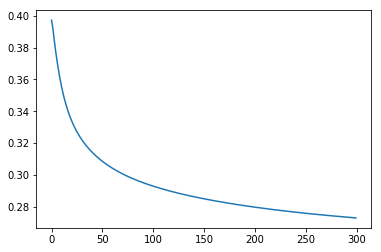

Seconds used for training: 74.7730
Match coefficient: 0.64
[[15.  2.]
 [25. 33.]]
Number of input neurons: 362
Number of neurons in 1st hidden layer: 32
Number of output neurons: 2


In [5]:
X = X_train_avg
target = y_train_avg
X_validate = X_validate_avg
y_validate = y_validate_avg
X_test = X_test_avg
y_test = y_test_avg

number_of_neurons_in_input = X.shape[1]
number_of_targets = target.shape[1]

net = mlp.MLP(number_of_neurons_in_input, number_of_neurons_in_hidden, number_of_targets, beta=beta, learning_rate=learning_rate)

t0 = time.time()
net.early_stopping(X, target, X_validate, y_validate, number_of_epochs)
t1 = time.time()
total_time = t1-t0
print("Seconds used for training: %0.4f" % total_time)

net.confusion(X_test, y_test)

net.print_network_architecture()